# Freeform Optimization

In [1]:
import numpy as np
from optiland import optic, optimization, analysis

Define a starting lens:

We define a singlet lens, which has a freeform as its first surface.

The freeform surface is defined as:

$z(x, y) = \frac{r^2}{R \cdot (1 + \sqrt{(1 - (1 + k) \cdot r^2 / R^2)})} + \sum\limits_{i}\sum\limits_{j}{C_{i, j} \cdot x^i \cdot y^j}$

where
- $x$ and $y$ are the local surface coordinates
- $r^2 = x^2 + y^2$
- $R$ is the radius of curvature
- $k$ is the conic constant
- $C_{i, j}$ is the polynomial coefficient for indices $i, j$

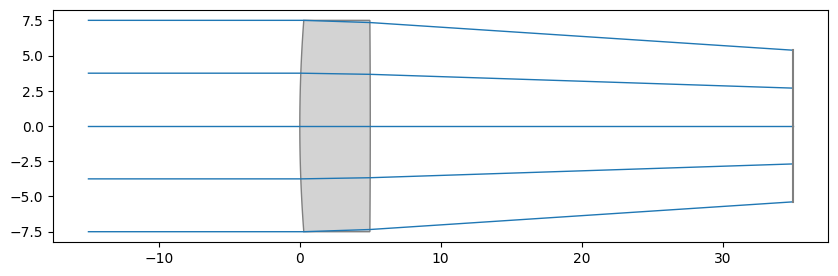

In [2]:
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, thickness=np.inf)
lens.add_surface(index=1, radius=100, thickness=5, surface_type='polynomial',  # <-- surface_type='polynomial'
                 is_stop=True, material='SF11', coefficients=[])
lens.add_surface(index=2, thickness=30, radius=-1000)
lens.add_surface(index=3)

# set aperture
lens.set_aperture(aperture_type='EPD', value=15)

# add field
lens.set_field_type(field_type='angle')
lens.add_field(y=0)

# add wavelength
lens.add_wavelength(value=0.55, is_primary=True)

# draw lens
lens.draw(num_rays=5)

Define optimization problem:

In [3]:
problem = optimization.OptimizationProblem()

Add operands (targets for optimization). We will minimize the RMS spot size on-axis and force the on-axis field chief ray to intersect the image plane at y = 3 mm.

In [4]:
# RMS spot size operand
input_data = {'optic': lens, 'surface_number': -1, 'Hx': 0, 'Hy': 0, 'wavelength': 0.55, 'num_rays': 5}
problem.add_operand(operand_type='rms_spot_size', target=0, weight=1, input_data=input_data)

# Real y-intercept operand
input_data = {'optic': lens, 'surface_number': -1, 'Hx': 0, 'Hy': 0, 'Px': 0, 'Py': 0, 'wavelength': 0.55}
problem.add_operand(operand_type='real_y_intercept', target=3, weight=1, input_data=input_data)  # <-- target=3

Define variables - let the first 9 coefficients of the polynomial coefficients vary.

In [5]:
for i in range(3):
    for j in range(3):
        problem.add_variable(lens, 'polynomial_coeff', surface_number=1, coeff_index=(i, j))

Check initial merit function value and system properties:

In [6]:
problem.info()

+----+------------------------+-------------------+
|    |   Merit Function Value |   Improvement (%) |
|----+------------------------+-------------------|
|  0 |                26.1803 |                 0 |
+----+------------------------+-------------------+
+----+------------------+----------+----------+---------+----------+--------------------+
|    | Operand Type     |   Target |   Weight |   Value |    Delta |   Contribution (%) |
|----+------------------+----------+----------+---------+----------+--------------------|
|  0 | rms spot size    |        0 |        1 | 4.14491 |  4.14491 |             65.623 |
|  1 | real y intercept |        3 |        1 | 0       | -3       |             34.377 |
+----+------------------+----------+----------+---------+----------+--------------------+
+----+------------------+-----------+---------+--------------+--------------+
|    | Variable Type    |   Surface |   Value | Min. Bound   | Max. Bound   |
|----+------------------+-----------+-------

Define optimizer:

In [7]:
optimizer = optimization.OptimizerGeneric(problem)

Run optimization:

In [8]:
optimizer.optimize(tol=1e-9)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.0007136726720011206
        x: [-4.565e-06 -1.158e-01  1.400e-02 -7.709e-09  1.591e-07
            -7.314e-09  1.394e-02 -1.418e-05  9.539e-07]
      nit: 16
      jac: [-5.123e-06  1.932e-04 -6.649e-04  9.056e-06  7.249e-03
            -2.941e-03 -1.224e-04  1.634e-03  1.562e-04]
     nfev: 370
     njev: 37
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>

Print merit function value and system properties after optimization:

In [9]:
problem.info()

+----+------------------------+-------------------+
|    |   Merit Function Value |   Improvement (%) |
|----+------------------------+-------------------|
|  0 |            0.000713673 |           99.9973 |
+----+------------------------+-------------------+
+----+------------------+----------+----------+----------+--------------+--------------------+
|    | Operand Type     |   Target |   Weight |    Value |        Delta |   Contribution (%) |
|----+------------------+----------+----------+----------+--------------+--------------------|
|  0 | rms spot size    |        0 |        1 | 0.026714 |  0.026714    |        99.9949     |
|  1 | real y intercept |        3 |        1 | 2.99981  | -0.000190397 |         0.00507948 |
+----+------------------+----------+----------+----------+--------------+--------------------+
+----+------------------+-----------+--------------+--------------+--------------+
|    | Variable Type    |   Surface |        Value | Min. Bound   | Max. Bound   |
|---

Draw final lens:

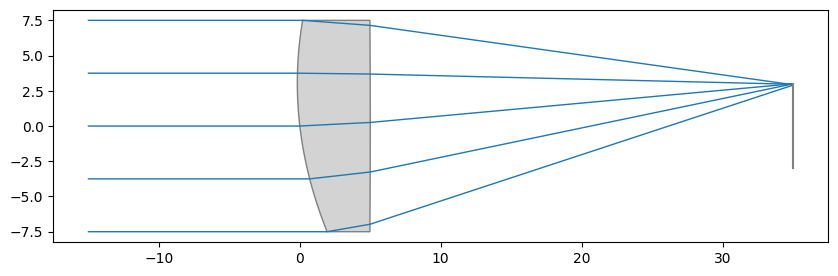

In [10]:
lens.draw(num_rays=5)